In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
FOLDER = "data/tiempos-minutos.csv"
SEED = 123
TEST_SIZE = 0.2

In [3]:
df = pd.read_csv(FOLDER, sep=";")
df.head()

,P1,P2,P3,P4,P5,P6,T_Final
0,172,254,356,385,514,636,703
1,163,253,371,408,556,674,738
2,188,279,389,419,580,728,803
3,195,288,397,425,579,729,800
4,195,296,415,453,619,766,863


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   P1       268 non-null    int64
 1   P2       268 non-null    int64
 2   P3       268 non-null    int64
 3   P4       268 non-null    int64
 4   P5       268 non-null    int64
 5   P6       268 non-null    int64
 6   T_Final  268 non-null    int64
dtypes: int64(7)
memory usage: 14.8 KB


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler

df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_scaled)

X_scaled = df_scaled[:, :-1]
y_scaled = df_scaled[:, -1]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, 
    y_scaled, 
    test_size=TEST_SIZE, 
    random_state=SEED
)

regr = SGDRegressor(
    loss="squared_error",
    penalty=None,
    max_iter=1000,
    learning_rate="constant",
    eta0=0.01,
    random_state=SEED,
    verbose=0,
)

regr.fit(X_scaled, y_scaled)


SGDRegressor(learning_rate='constant', penalty=None, random_state=123)

In [13]:
r2 = regr.score(X_test_scaled, y_test_scaled)
print(f"R2: {r2}")

R2: 0.9137668009683038


In [ ]:

regr = SGDRegressor(
    loss="squared_error",
    penalty=None,
    max_iter=1,
    learning_rate="constant",
    eta0=0.1,
    random_state=SEED,
    verbose=0,
)

n_epochs = 1000
r2_list = []
for epoch in range(n_epochs):
    regr.partial_fit(X_train_scaled, y_train_scaled)
    r2 = regr.score(X_test_scaled, y_test_scaled)
    r2_list.append(r2)

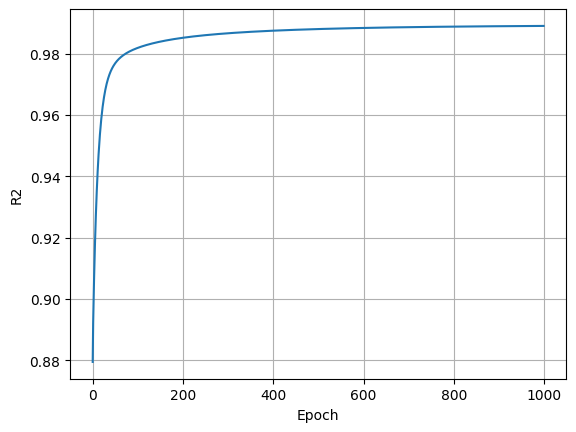

In [24]:
plt.plot(r2_list)
plt.xlabel("Epoch")
plt.grid()
plt.ylabel("R2")
plt.show()